# Visualisierungen zur Inkunabelproduktion der Stadt Bamberg

**Dokumentation** über die Erstellung der Visualisierungen zur Inkunabelproduktion der Stadt Bamberg, die in der Masterarbeit "Produktivität frühneuzeitlicher Druckorte am Beispiel Bamberg - Datenanalysen und Visualisierungen auf Basis des Gesamtkatalogs der Wiegendrucke" analysiert werden. <br/>

**verwendete Technologien:** Python 3 (Pakete: pandas, matplotlib, seaborn) <br/>
**Datengrundlage:** extrahierte Daten aus den XML-Werkkatalogen des Gesamtkatalog der Wiegendrucke zu finden in der CSV-Datei 2020-11-11_norm_all_final_editions.csv

## Inhaltsverzeichnis

1. [Importe](#1.)<br/>
2. [GW Daten laden](#2.)<br/>
3. [Überblick DataFrames](#3.) <br/>
4. [Ausgaben pro Jahr](#4.) <br/>
4.1 [Ausgaben pro Jahr (nur no)](#4.1) <br/>
4.2 [Ausgaben pro Jahr gesamt](#4.2) <br/>
4.3 [Ausgaben pro Jahr (mit Sprache)](#4.3) <br/>
4.4 [Ausgaben pro Jahr (mit Publikationstyp) ](#4.4) <br/>
4.5 [Ausgaben pro Jahr (mit Format)](#4.5) <br/>
4.6 [Ausgaben pro Jahr (mit Offizin)](#4.6) <br/>
5. [Foliobögen pro Jahr](#5.) <br/>
6. [Korrelation Foliobögen/Jahr - Ausgaben/Jahr](#6.) <br/>
7. [Sprache](#7.) <br/>
7.1 [Sprache gesamt](#7.1) <br/>
7.2 [Sprache pro Offizin](#7.2) <br/>
8. [Publikationstyp](#8.) <br/>
8.1 [Publikationstyp gesamt](#8.1) <br/>
8.2 [Publikationstyp pro Offizin](#8.2) <br/>
9. [Format](#9.) <br/>
9.1 [Format gesamt](#9.1) <br/>
9.2 [Fomat pro Offizin](#9.2) <br/>
10. [Jahresproduktion Bamberg - Häufigkeitsverteilung](#10.) <br/>
10.1 [Häufigkeit Ausgaben/Jahr](#10.1) <br/>
10.2 [Häufigkeit Foliobögen/Jahr](#10.3) <br/>
11. [Korrelation Sprache-Format-Publikationstyp](#11.) <br/>

## 1. Importe <a id="1."></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. GW Daten laden <a id="2."></a>

In [2]:
# laden der CSV-Daten
gw_ed = pd.read_csv('../05_Datenextraktion/Ausgaben_normalisiert/2020-11-11_norm_all_final_editions.csv', sep=';')
gw_ed

no_mp_bs GW-Nummer URN /aid           Autor  \
0         no   GW00194   ACKEBOH            NaN   
1         no   GW04325   BIBLPAU            NaN   
2         no   GW04326   BIBLPAU            NaN   
3         no   GW04327   BIBLPAU            NaN   
4         no   GW04839   BONEULR  Boner, Ulrich   
..       ...       ...       ...            ...   
134       no   GW12134    HASKUN      Has, Kunz   
135       no    M17603   LEGENDA            NaN   
136       no   GW00193   ACKEBOH            NaN   
137       no    M44004   STERNBE            NaN   
138       no  M1877110   LOSBUCH            NaN   

                                 Titel  \
0                 Ackermann von Böhmen   
1                      Biblia pauperum   
2                      Biblia pauperum   
3                      Biblia pauperum   
4                        Der Edelstein   
..                                 ...   
134                  Von der Welt Lauf   
135                Legenda St. Sebaldi   
136               Ackermann von Böhmen   
137  Geschichte der Juden zu Sternberg   
138                            Losbuch   

                                               Incipit Sprache norm_spr  \
0    Grimmiger abtilger aller leut schedlicher echt...     ger      ger   
1            Ysaias. Sich ein jungfrau wirt empfahen …     ger      ger   
2    Ysaias. vii. Ecce virgo concipiet et pariet fi...     lat      lat   
3                                                  NaN     ger      ger   
4    Eins mals ein affe kam gerant do er vil guter ...     ger      ger   
..                                                 ...     ...      ...   
134  Nun hört mir zu ein abenteür dy mir ist widerf...     ger      ger   
135  Es was ein künig zu Tenmarck der was gar tugen...     ger      ger   
136  Grimmiger abtilger aller leut schedlicher echt...     ger      ger   
137  Aller menigklich sey zu wissen die grosse mish...     ger      ger   
138  Hört und merket eben wie die liebe hie auff er...     ger      ger   

    Druckort                                            Drucker  \
0    Bamberg                                   Albrecht Pfister   
1    Bamberg                                   Albrecht Pfister   
2    Bamberg                                   Albrecht Pfister   
3    Bamberg                                   Albrecht Pfister   
4    Bamberg                                   Albrecht Pfister   
..       ...                                                ...   
134  Bamberg                      Marx Ayrer und Hans Bernecker   
135  Bamberg                      Marx Ayrer und Hans Bernecker   
136  Bamberg  unbekannter Drucker mit Typen des Albrecht Pfi...   
137  Bamberg  unbekannter Drucker mit Typen von Johann Sense...   
138  Bamberg                                         Marx Ayrer   

              Druckdatum  norm_date Format Blattzahl  Foliobögen Satzspiegel  \
0                um 1463       1463      2        24        12.0         NaN   
1                um 1462       1462      2        18         9.0         NaN   
2             um 1462/63       1462      2        18         9.0         NaN   
3                um 1463       1463      2        22        11.0         NaN   
4             14.II.1461       1461      2        88        44.0         NaN   
..                   ...        ...    ...       ...         ...         ...   
134                14]93       1493      4        10         2.5         NaN   
135                14]93       1493      4        10         2.5         NaN   
136              um 1470       1470      2        24        12.0         NaN   
137  nicht vor 24.X.1492       1496      4         4         1.0         NaN   
138                 1483       1483      4        12         3.0         NaN   

    Zeilenzahl                                Abbildungen  
0          NaN                                          5  
1          NaN            136 Hlzs., dar. zahlreiche Wdh.  
2          NaN            136 Hlzs., da

### Erläuterungen
Die Spalte **no_mp_bs** enthält Angaben zum Publikationstyp: <br/>
**no:** normale Drucke <br/>
**bs:** Einblattdrucke <br/>
**mp:** mehrbändige Drucke <br/>

Die Spalte **Sprache** enthält die Angaben zur Sprache, wie sie aus dem GW-XML extrahiert wurden. Die Spalte **norm_spr** enthält die normalisierte Form der Sprachangaben mit den möglichen Werten **ger, lat** und **ger lat**.
Gleiches gilt für die Angaben zum Druckdatum: Die Spalte **Druckdatum** beinhaltet die Angaben aus dem GW, **norm_date** beinhaltet die normalisierten Datumsformen. Das Vorgehen bei den Normalisierungen ist im Kapitel "Datenextraktion und Preprocessing" beschrieben.

## 3. Überblick DataFrames <a id="3."></a>

Basisdaten:
**gw_ed:** entspricht der Datei 2020-11-11_norm_all_final_editions.csv

Aus den Basisdaten gewonnene DataFrames: <br>
**gw_ed_no:** enthält nur die Datensätze mit Publikationstyp no <br>
**gw_no_count:** basiert auf gw_ed_no, enthält nur Spalten "norm_date" und neu aggregierte Spalte "Ausgaben" (Angaben dazu, wie viele normale Drucke pro Jahr hergestellt wurden)<br>

**gw_ed_offices:** enthält eine zusätzliche Spalte mit angaben zu den Offizinen <br>

**gw_folio:** enthält nur die Spalten "norm_date" und "Foliobögen"<br>
**gw_folio_grouped:** gw_folio nach Jahren gruppiert <br>
**gw_folio_grouped_reset:** gw_folio_grouped mit Index Reset<br>
**gw_folio_no_count:** merge von gw_no_count und gw_folio_grouped<br>

**f_ed:** enthält nur Spalten "norm_date" und neu aggregierte Spalte "Ausgaben" (Angaben dazu, wie viele Ausgaben pro Jahr insgesamt hergestellt wurden)

## 4. Ausgaben pro Jahr <a id="4."></a>

### 4.1 Ausgaben pro Jahr (nur no) <a id="4.1"></a>

Dieser reduzierte Datensatz wird zum Vergleich der Ausgaben/Jahr mit den Foliobögen/Jahr verwendet, da es nur beim Publikationstyp *no* Angaben zu den Foliobögen gibt.

In [3]:
# erstellt einen neuen DataFrame, der nur die rows mit 'no' beinhaltet
gw_ed_no = gw_ed[gw_ed['no_mp_bs'] == 'no']
gw_ed_no

no_mp_bs GW-Nummer URN /aid           Autor  \
0         no   GW00194   ACKEBOH            NaN   
1         no   GW04325   BIBLPAU            NaN   
2         no   GW04326   BIBLPAU            NaN   
3         no   GW04327   BIBLPAU            NaN   
4         no   GW04839   BONEULR  Boner, Ulrich   
..       ...       ...       ...            ...   
134       no   GW12134    HASKUN      Has, Kunz   
135       no    M17603   LEGENDA            NaN   
136       no   GW00193   ACKEBOH            NaN   
137       no    M44004   STERNBE            NaN   
138       no  M1877110   LOSBUCH            NaN   

                                 Titel  \
0                 Ackermann von Böhmen   
1                      Biblia pauperum   
2                      Biblia pauperum   
3                      Biblia pauperum   
4                        Der Edelstein   
..                                 ...   
134                  Von der Welt Lauf   
135                Legenda St. Sebaldi   
136               Ackermann von Böhmen   
137  Geschichte der Juden zu Sternberg   
138                            Losbuch   

                                               Incipit Sprache norm_spr  \
0    Grimmiger abtilger aller leut schedlicher echt...     ger      ger   
1            Ysaias. Sich ein jungfrau wirt empfahen …     ger      ger   
2    Ysaias. vii. Ecce virgo concipiet et pariet fi...     lat      lat   
3                                                  NaN     ger      ger   
4    Eins mals ein affe kam gerant do er vil guter ...     ger      ger   
..                                                 ...     ...      ...   
134  Nun hört mir zu ein abenteür dy mir ist widerf...     ger      ger   
135  Es was ein künig zu Tenmarck der was gar tugen...     ger      ger   
136  Grimmiger abtilger aller leut schedlicher echt...     ger      ger   
137  Aller menigklich sey zu wissen die grosse mish...     ger      ger   
138  Hört und merket eben wie die liebe hie auff er...     ger      ger   

    Druckort                                            Drucker  \
0    Bamberg                                   Albrecht Pfister   
1    Bamberg                                   Albrecht Pfister   
2    Bamberg                                   Albrecht Pfister   
3    Bamberg                                   Albrecht Pfister   
4    Bamberg                                   Albrecht Pfister   
..       ...                                                ...   
134  Bamberg                      Marx Ayrer und Hans Bernecker   
135  Bamberg                      Marx Ayrer und Hans Bernecker   
136  Bamberg  unbekannter Drucker mit Typen des Albrecht Pfi...   
137  Bamberg  unbekannter Drucker mit Typen von Johann Sense...   
138  Bamberg                                         Marx Ayrer   

              Druckdatum  norm_date Format Blattzahl  Foliobögen Satzspiegel  \
0                um 1463       1463      2        24        12.0         NaN   
1                um 1462       1462      2        18         9.0         NaN   
2             um 1462/63       1462      2        18         9.0         NaN   
3                um 1463       1463      2        22        11.0         NaN   
4             14.II.1461       1461      2        88        44.0         NaN   
..                   ...        ...    ...       ...         ...         ...   
134                14]93       1493      4        10         2.5         NaN   
135                14]93       1493      4        10         2.5         NaN   
136              um 1470       1470      2        24        12.0         NaN   
137  nicht vor 24.X.1492       1496      4         4         1.0         NaN   
138                 1483       1483      4        12         3.0         NaN   

    Zeilenzahl                                Abbildungen  
0          NaN                                          5  
1          NaN            136 Hlzs., dar. zahlreiche Wdh.  
2          NaN            136 Hlzs., da

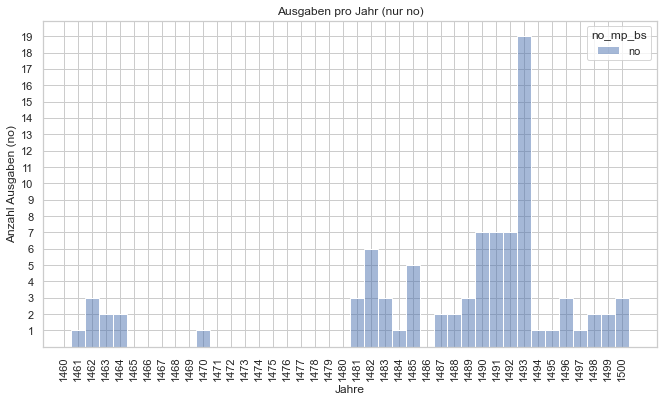

In [17]:
# erstellt ein Histogramm über die jährlich produzierten Ausgaben des Typs 'no'
plt.figure(figsize=(11,6))
plt.yticks(range(1,21,1))
plt.xticks(range(1460,1501,1),rotation=90)
plt.xlabel('Jahre')
plt.ylabel('Anzahl Ausgaben (no)')
plt.title('Ausgaben pro Jahr (nur no)')
sns.set_context('poster')
sns.set_theme(style="whitegrid")
sns.histplot(data=gw_ed_no, x="norm_date", discrete=True, hue="no_mp_bs")

# speichert die Visualisierung
# plt.savefig('graphics/ausgaben_jahr_no.svg')

### 4.2 Ausgaben pro Jahr gesamt <a id="4.2"></a>

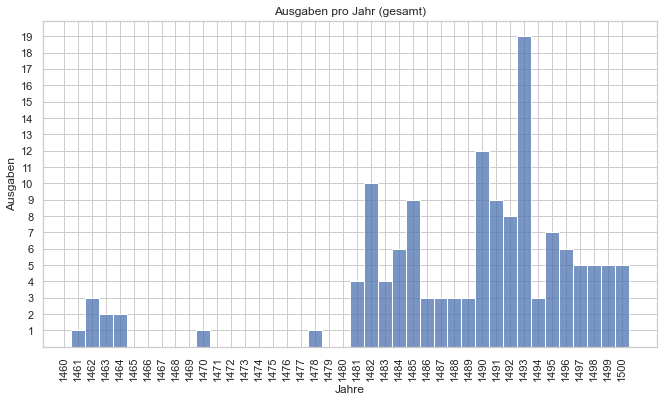

In [16]:
# erstellt ein Histogramm über die jährlich produzierten Ausgaben insgesamt
plt.figure(figsize=(11,6))
plt.yticks(range(1,21,1))
plt.xticks(range(1460,1501,1),rotation=90)
plt.xlabel('Jahre')
plt.ylabel('Ausgaben')
plt.title('Ausgaben pro Jahr (gesamt)')
sns.set_context('poster')
sns.set_theme(style="whitegrid")
sns.histplot(data=gw_ed, x="norm_date", discrete=True)

# speichert die Visualisierung
# plt.savefig('graphics/ausgaben_jahr_gesamt.svg')

### 4.3 Ausgaben pro Jahr (mit Sprache) <a id="4.3"></a>

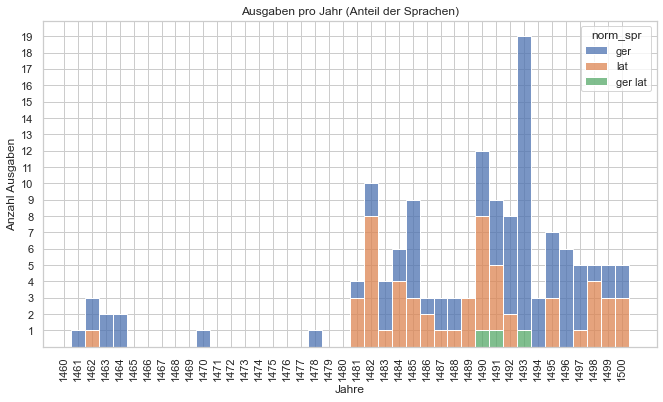

In [23]:
# erstellt ein Histogramm über die jährlich produzierten Ausgaben mit Hervorhebung der Sprachen
plt.figure(figsize=(11,6))
plt.yticks(range(1,21,1))
plt.xticks(range(1460,1501,1),rotation=90)
plt.xlabel('Jahre')
plt.ylabel('Anzahl Ausgaben')
plt.title('Ausgaben pro Jahr (Anteil der Sprachen)')
sns.set_context('poster')
sns.set_theme(style="whitegrid")
sns.histplot(data=gw_ed, x="norm_date", discrete=True, hue="norm_spr", multiple="stack")

# speichert die Visualisierung
# plt.savefig('graphics/ausgaben_jahr_sprache.svg')

### 4.4 Ausgaben pro Jahr (mit Publikationstyp) <a id="4.4"></a>

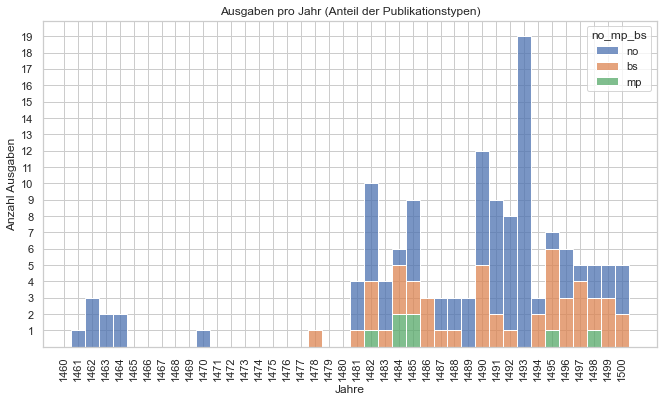

In [24]:
# erstellt ein Histogramm über die jährlich produzierten Ausgaben mit Hervorhebung der Publikationstypen
plt.figure(figsize=(11,6))
plt.yticks(range(1,21,1))
plt.xticks(range(1460,1501,1),rotation=90)
plt.xlabel('Jahre')
plt.ylabel('Anzahl Ausgaben')
plt.title('Ausgaben pro Jahr (Anteil der Publikationstypen)')
sns.set_context('poster')
sns.set_theme(style="whitegrid")
hue_order = ['no', 'bs', 'mp']
sns.histplot(data=gw_ed, x="norm_date", discrete=True, hue="no_mp_bs", hue_order=hue_order, multiple="stack")

# speichert die Visualisierung
# plt.savefig('graphics/ausgaben_jahr_publtyp.svg')

### 4.5 Ausgaben pro Jahr (mit Format) <a id="4.5"></a>

In [25]:
# erstellt ein Histogramm über die jährlich produzierten Ausgaben mit Hervorhebung der Formate
plt.figure(figsize=(11,6))
plt.yticks(range(1,21,1))
plt.xticks(range(1460,1501,1),rotation=90)
plt.xlabel('Jahre')
plt.ylabel('Anzahl Ausgaben')
plt.title('Ausgaben pro Jahr (Anteil der Formate)')
sns.set_context('poster')
sns.set_theme(style="whitegrid")
hue_order_format =['2','4','8','12', 'k.A.']
sns.histplot(data=gw_ed, x="norm_date", discrete=True, hue="Format", hue_order=hue_order_format, multiple="stack")

# speichert die Visualisierung
# plt.savefig('graphics/ausgaben_jahr_format.svg')

### 4.6 Ausgaben pro Jahr (mit Offizin) <a id="4.6"></a>

Um eine Visualisierung zu erhalten, welche die Anzahl der Ausgaben/Jahr nach Druckerwerkstätten gruppiert, muss zunächst ein neuer DataFrame mit einer zusätzlichen Spalte "Offizin" erstellt werden. Die Angaben zu den Druckern werden dabei gemäß dem folgenden Ersetzungs-Dictionary zu Offizinen zusammengefasst.

In [26]:
# Ersetzungs-Dictionary, fasst Drucker zu Offizinen zusammen
repl_offices = {
    'Heinrich Petzensteiner' : 'J. Sensenschmidt/Petzensteiner',
    'Johann Sensenschmidt' : 'J. Sensenschmidt/Petzensteiner',
    'Johann Sensenschmidt und Heinrich Petzensteiner' : 'J. Sensenschmidt/Petzensteiner',
    'Johann Pfeyl' : 'Pfeyl/L. Sensenschmidt/Petzensteiner',
    'Lorenz Sensenschmidt' : 'Pfeyl/L. Sensenschmidt/Petzensteiner',
    'Lorenz Sensenschmidt , Heinrich Petzensteiner und Johann Pfeyl': 'Pfeyl/L. Sensenschmidt/Petzensteiner',
    'Lorenz Sensenschmidt , Johann Pfeyl und Heinrich Petzensteiner' : 'Pfeyl/L. Sensenschmidt/Petzensteiner',
    'Heinrich Petzensteiner und Johann Pfeyl' : 'Pfeyl/L. Sensenschmidt/Petzensteiner',
    'Marx Ayrer' : 'Ayrer/Bernecker',
    'Marx Ayrer und Hans Bernecker': 'Ayrer/Bernecker',
    'unbekannter Drucker mit Typen des Albrecht Pfister': 'unbekannt',
    'unbekannter Drucker mit Typen von Johann Sensenschmidt': 'unbekannt',
    'Albrecht Pfister': 'Albrecht Pfister',
    'Hans Sporer': 'Hans Sporer'
}

In [27]:
# erstellt mithilfe einer Lambda-Funktion neuen DataFrame mit Spalte "Offizin"
gw_ed_offices = gw_ed
gw_ed_offices['Offizin'] = gw_ed_offices['Drucker'].apply(lambda printer: repl_offices[printer])
gw_ed_offices

no_mp_bs GW-Nummer URN /aid           Autor  \
0         no   GW00194   ACKEBOH            NaN   
1         no   GW04325   BIBLPAU            NaN   
2         no   GW04326   BIBLPAU            NaN   
3         no   GW04327   BIBLPAU            NaN   
4         no   GW04839   BONEULR  Boner, Ulrich   
..       ...       ...       ...            ...   
134       no   GW12134    HASKUN      Has, Kunz   
135       no    M17603   LEGENDA            NaN   
136       no   GW00193   ACKEBOH            NaN   
137       no    M44004   STERNBE            NaN   
138       no  M1877110   LOSBUCH            NaN   

                                 Titel  \
0                 Ackermann von Böhmen   
1                      Biblia pauperum   
2                      Biblia pauperum   
3                      Biblia pauperum   
4                        Der Edelstein   
..                                 ...   
134                  Von der Welt Lauf   
135                Legenda St. Sebaldi   
136               Ackermann von Böhmen   
137  Geschichte der Juden zu Sternberg   
138                            Losbuch   

                                               Incipit Sprache norm_spr  \
0    Grimmiger abtilger aller leut schedlicher echt...     ger      ger   
1            Ysaias. Sich ein jungfrau wirt empfahen …     ger      ger   
2    Ysaias. vii. Ecce virgo concipiet et pariet fi...     lat      lat   
3                                                  NaN     ger      ger   
4    Eins mals ein affe kam gerant do er vil guter ...     ger      ger   
..                                                 ...     ...      ...   
134  Nun hört mir zu ein abenteür dy mir ist widerf...     ger      ger   
135  Es was ein künig zu Tenmarck der was gar tugen...     ger      ger   
136  Grimmiger abtilger aller leut schedlicher echt...     ger      ger   
137  Aller menigklich sey zu wissen die grosse mish...     ger      ger   
138  Hört und merket eben wie die liebe hie auff er...     ger      ger   

    Druckort                                            Drucker  \
0    Bamberg                                   Albrecht Pfister   
1    Bamberg                                   Albrecht Pfister   
2    Bamberg                                   Albrecht Pfister   
3    Bamberg                                   Albrecht Pfister   
4    Bamberg                                   Albrecht Pfister   
..       ...                                                ...   
134  Bamberg                      Marx Ayrer und Hans Bernecker   
135  Bamberg                      Marx Ayrer und Hans Bernecker   
136  Bamberg  unbekannter Drucker mit Typen des Albrecht Pfi...   
137  Bamberg  unbekannter Drucker mit Typen von Johann Sense...   
138  Bamberg                                         Marx Ayrer   

              Druckdatum  norm_date Format Blattzahl  Foliobögen Satzspiegel  \
0                um 1463       1463      2        24        12.0         NaN   
1                um 1462       1462      2        18         9.0         NaN   
2             um 1462/63       1462      2        18         9.0         NaN   
3                um 1463       1463      2        22        11.0         NaN   
4             14.II.1461       1461      2        88        44.0         NaN   
..                   ...        ...    ...       ...         ...         ...   
134                14]93       1493      4        10         2.5         NaN   
135                14]93       1493      4        10         2.5         NaN   
136              um 1470       1470      2        24        12.0         NaN   
137  nicht vor 24.X.1492       1496      4         4         1.0         NaN   
138                 1483       1483      4        12         3.0         NaN   

    Zeilenzahl                                Abbildungen           Offizin  
0          NaN                                          5  Albrecht Pfister  
1          NaN            136 Hlzs., dar. zahlreiche Wdh.  Albr

In [28]:
# verschiebt Spalte "Offizin", sodass sie nach der Spalte "Drucker" erscheint
offices = gw_ed_offices.pop('Offizin')
gw_ed_offices.insert(10, 'Offizin', offices) 
gw_ed_offices

no_mp_bs GW-Nummer URN /aid           Autor  \
0         no   GW00194   ACKEBOH            NaN   
1         no   GW04325   BIBLPAU            NaN   
2         no   GW04326   BIBLPAU            NaN   
3         no   GW04327   BIBLPAU            NaN   
4         no   GW04839   BONEULR  Boner, Ulrich   
..       ...       ...       ...            ...   
134       no   GW12134    HASKUN      Has, Kunz   
135       no    M17603   LEGENDA            NaN   
136       no   GW00193   ACKEBOH            NaN   
137       no    M44004   STERNBE            NaN   
138       no  M1877110   LOSBUCH            NaN   

                                 Titel  \
0                 Ackermann von Böhmen   
1                      Biblia pauperum   
2                      Biblia pauperum   
3                      Biblia pauperum   
4                        Der Edelstein   
..                                 ...   
134                  Von der Welt Lauf   
135                Legenda St. Sebaldi   
136               Ackermann von Böhmen   
137  Geschichte der Juden zu Sternberg   
138                            Losbuch   

                                               Incipit Sprache norm_spr  \
0    Grimmiger abtilger aller leut schedlicher echt...     ger      ger   
1            Ysaias. Sich ein jungfrau wirt empfahen …     ger      ger   
2    Ysaias. vii. Ecce virgo concipiet et pariet fi...     lat      lat   
3                                                  NaN     ger      ger   
4    Eins mals ein affe kam gerant do er vil guter ...     ger      ger   
..                                                 ...     ...      ...   
134  Nun hört mir zu ein abenteür dy mir ist widerf...     ger      ger   
135  Es was ein künig zu Tenmarck der was gar tugen...     ger      ger   
136  Grimmiger abtilger aller leut schedlicher echt...     ger      ger   
137  Aller menigklich sey zu wissen die grosse mish...     ger      ger   
138  Hört und merket eben wie die liebe hie auff er...     ger      ger   

    Druckort                                            Drucker  \
0    Bamberg                                   Albrecht Pfister   
1    Bamberg                                   Albrecht Pfister   
2    Bamberg                                   Albrecht Pfister   
3    Bamberg                                   Albrecht Pfister   
4    Bamberg                                   Albrecht Pfister   
..       ...                                                ...   
134  Bamberg                      Marx Ayrer und Hans Bernecker   
135  Bamberg                      Marx Ayrer und Hans Bernecker   
136  Bamberg  unbekannter Drucker mit Typen des Albrecht Pfi...   
137  Bamberg  unbekannter Drucker mit Typen von Johann Sense...   
138  Bamberg                                         Marx Ayrer   

              Offizin           Druckdatum  norm_date Format Blattzahl  \
0    Albrecht Pfister              um 1463       1463      2        24   
1    Albrecht Pfister              um 1462       1462      2        18   
2    Albrecht Pfister           um 1462/63       1462      2        18   
3    Albrecht Pfister              um 1463       1463      2        22   
4    Albrecht Pfister           14.II.1461       1461      2        88   
..                ...                  ...        ...    ...       ...   
134   Ayrer/Bernecker                14]93       1493      4        10   
135   Ayrer/Bernecker                14]93       1493      4        10   
136         unbekannt              um 1470       1470      2        24   
137         unbekannt  nicht vor 24.X.1492       1496      4         4   
138   Ayrer/Bernecker                 1483       1483      4        12   

     Foliobögen Satzspiegel Zeilenzahl  \
0          12.0         NaN        NaN   
1           9.0         NaN        NaN   
2           9.0         NaN        NaN   
3          11.0         NaN        NaN   
4          44.0         NaN        NaN   
..          ...         ...        ... 

In [29]:
# speichert den neuen DataFrame als CSV-Datei
# gw_ed_offices.to_csv('gw_ed_offices.csv', sep='|')

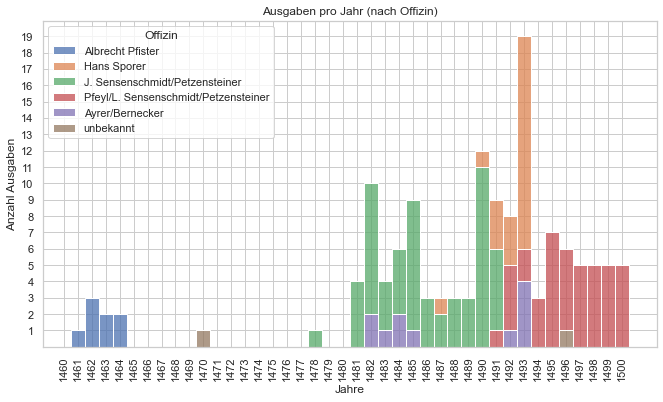

In [31]:
# erstellt ein Histogramm über die jährlich produzierten Ausgaben mit Hervorhebung der Offizinen
plt.figure(figsize=(11,6))
plt.yticks(range(1,21,1))
plt.xticks(range(1460,1501,1),rotation=90)
plt.xlabel('Jahre')
plt.ylabel('Anzahl Ausgaben')
plt.title('Ausgaben pro Jahr (nach Offizin)')
sns.set_context('poster')
sns.set_theme(style="whitegrid")
sns.histplot(data=gw_ed_offices, x="norm_date", discrete=True, hue="Offizin", multiple="stack")

# speichert die Visualisierung
# plt.savefig('graphics/ausgaben_jahr_offizin.svg')

## 5. Foliobögen pro Jahr <a id="5."></a>

In [33]:
# erstellt einen Ausschnitt aus gw_ed, der nur die Spalten "norm_date" und "Foliobögen" enthält 
gw_folio = gw_ed[['norm_date', 'Foliobögen']]
gw_folio

norm_date  Foliobögen
0         1463        12.0
1         1462         9.0
2         1462         9.0
3         1463        11.0
4         1461        44.0
..         ...         ...
134       1493         2.5
135       1493         2.5
136       1470        12.0
137       1496         1.0
138       1483         3.0

[139 rows x 2 columns]

In [37]:
# gruppiert den DataFrame nach norm_date und bildet die Summe der Foliobögen, norm_date wird zum Index
gw_folio_grouped = pd.DataFrame(gw_folio.groupby(['norm_date'])['Foliobögen'].sum())
gw_folio_grouped

# speichert den neuen DataFrame als CSV-Datei
# gw_folio_grouped.to_csv('folioboegen_year.csv', sep=";")

Foliobögen
norm_date            
1461            44.00
1462            57.00
1463            23.00
1464            76.50
1470            12.00
1478             0.00
1481           147.50
1482            62.50
1483            61.75
1484             0.75
1485            14.50
1486             0.00
1487             9.00
1488           186.50
1489           530.50
1490           180.50
1491           213.00
1492           385.00
1493            35.00
1494             2.00
1495             1.00
1496             2.50
1497           169.00
1498             2.00
1499           157.50
1500           174.00

In [38]:
# Index Reset: norm_date wird wieder als normaler Spaltenname und nicht mehr als Index betrachtet
gw_folio_grouped_reset = gw_folio_grouped.reset_index()
gw_folio_grouped_reset.head()

norm_date  Foliobögen
0       1461        44.0
1       1462        57.0
2       1463        23.0
3       1464        76.5
4       1470        12.0

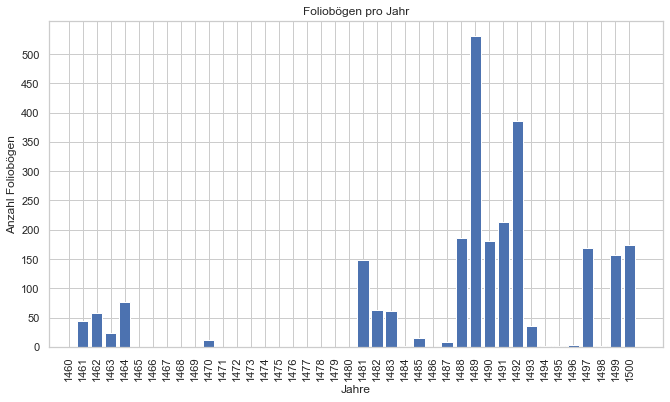

In [40]:
# erstellt eine Visualisierung der jährlich bedruckten Foliobögen
plt.figure(figsize=(11,6))
plt.yticks(range(0,550,50))
plt.xticks(range(1460,1501,1),rotation=90)
plt.xlabel('Jahre')
plt.ylabel('Anzahl Foliobögen')
plt.title('Foliobögen pro Jahr')
plt.bar(x = gw_folio_grouped_reset['norm_date'], height = gw_folio_grouped_reset['Foliobögen'])

# speichert die Visualisierung
# plt.savefig('graphics/folio_jahr.svg')

## 6. Korrelation Foliobögen/Jahr - Ausgaben/Jahr <a id="6."></a>

Um die Korrelation zwischen den Ausgaben/Jahr und den Foliobögen/Jahr analysieren zu können, muss zunächst eine neuer DataFrame erstellt werden, der Infos zur Anzahl der Ausgaben/Jahr und Foliobögen/Jahr umfasst. Die Basis dafür bildet gw_ed_no.

In [43]:
# zählt wie viele GW-Nummern pro Jahr vorkommen, ermittelt so die Anzahl der Ausgaben/Jahr
# die Spalte "GW-Nummer" wird in "Ausgaben" umbenannt
gw_no_count = pd.DataFrame(gw_ed_no.groupby(['norm_date'])['GW-Nummer'].count())
gw_no_count.rename(columns={'GW-Nummer':'Ausgaben'}, inplace=True)
gw_no_count

Ausgaben
norm_date          
1461              1
1462              3
1463              2
1464              2
1470              1
1481              3
1482              6
1483              3
1484              1
1485              5
1487              2
1488              2
1489              3
1490              7
1491              7
1492              7
1493             19
1494              1
1495              1
1496              3
1497              1
1498              2
1499              2
1500              3

In [44]:
# zusammenfügen von gw_no_count und gw_folio_grouped
gw_folio_no_count = gw_no_count.merge(gw_folio_grouped, on='norm_date')
gw_folio_no_count

Ausgaben  Foliobögen
norm_date                      
1461              1       44.00
1462              3       57.00
1463              2       23.00
1464              2       76.50
1470              1       12.00
1481              3      147.50
1482              6       62.50
1483              3       61.75
1484              1        0.75
1485              5       14.50
1487              2        9.00
1488              2      186.50
1489              3      530.50
1490              7      180.50
1491              7      213.00
1492              7      385.00
1493             19       35.00
1494              1        2.00
1495              1        1.00
1496              3        2.50
1497              1      169.00
1498              2        2.00
1499              2      157.50
1500              3      174.00

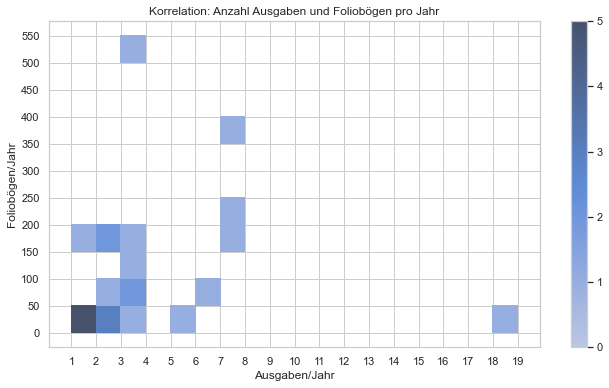

In [48]:
# Korrelation von Ausgaben/Jahr und Foliobögen/Jahr als Heatmap
plt.figure(figsize=(11,6))
plt.yticks(range(0,600,50))
plt.xticks(range(0,21,1))
plt.xlabel('Ausgaben/Jahr')
plt.ylabel('Foliobögen/Jahr')
plt.title('Korrelation: Anzahl Ausgaben und Foliobögen pro Jahr')
sns.histplot(gw_folio_no_count, x="Ausgaben", y="Foliobögen", cbar=True, binwidth=(1,50))

# speichert die Visualisierung
# plt.savefig('graphics/heatmap_folio_no.svg')

#### Bravais-Pearson Korrelationskoeffizient

In [46]:
# berechnen des Bravais-Pearson-Korrelationskoeffizienten
folio_no_corr = gw_folio_no_count.corr()
folio_no_corr

Ausgaben  Foliobögen
Ausgaben    1.000000    0.119552
Foliobögen  0.119552    1.000000

#### Korrelationskoeffizient nach Spearman

In [47]:
# berechnet den Korrelationskoeffizienten nach Spearman
gw_folio_no_spearman = gw_folio_no_count.corr('spearman')
gw_folio_no_spearman

Ausgaben  Foliobögen
Ausgaben    1.000000    0.498585
Foliobögen  0.498585    1.000000

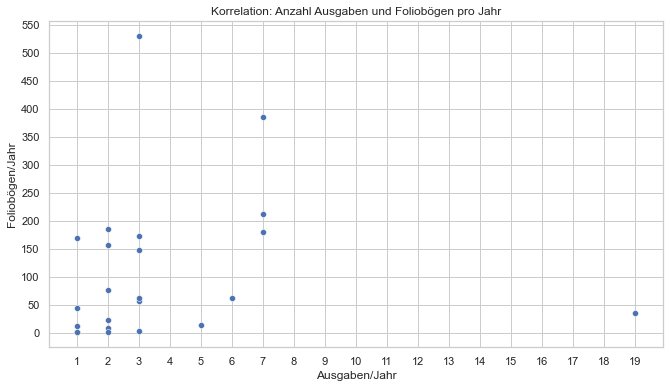

In [51]:
# Korrelation von Ausgaben/Jahr und Foliobögen/Jahr als Scatterplot
plt.figure(figsize=(11,6))
plt.yticks(range(0,600,50))
plt.xticks(range(0,21,1))
plt.xlabel('Ausgaben/Jahr')
plt.ylabel('Foliobögen/Jahr')
plt.title('Korrelation: Anzahl Ausgaben und Foliobögen pro Jahr')
sns.scatterplot(x = 'Ausgaben', y ='Foliobögen', data=gw_folio_no_count)

# speichert die Visualisierung
# plt.savefig('graphics/scatterplot_folio_no.svg')

## 7. Sprache <a id="7."></a>

### 7.1 Sprache gesamt <a id="7.1"></a>

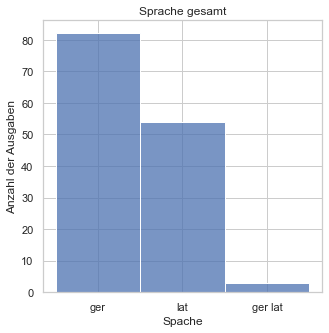

In [14]:
# Visualisierung zur Verteilung der Sprachen insgesamt
plt.figure(figsize=(5,5))
plt.yticks(range(0,90,10))
plt.title('Sprache gesamt')
plt.xlabel('Spache')
plt.ylabel('Anzahl der Ausgaben')
sns.set_context('poster')
sns.set_theme(style="whitegrid")
sns.histplot(data=gw_ed, x="norm_spr", discrete=True)

# speichert die Visualisierung
# plt.savefig('graphics/sprache_gesamt.svg')

### 7.2 Sprache pro Offizin <a id="7.2"></a>

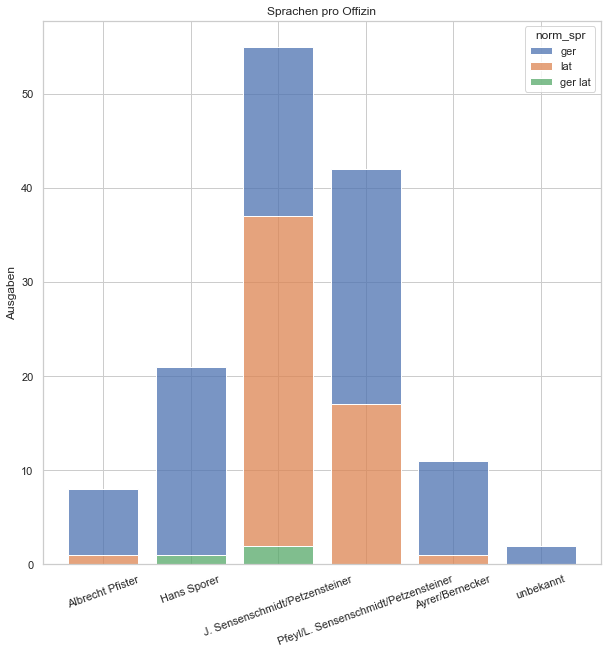

In [94]:
plt.figure(figsize=(10,10))
plt.title('Sprachen pro Offizin')
plt.xlabel(' ')
plt.ylabel('Ausgaben')
sns.set_context('poster')
sns.set_theme(style="whitegrid")
sns.histplot(data=gw_ed_offices, x="Offizin", hue="norm_spr", multiple="stack", shrink=.8)
plt.xticks(rotation = 20);

# speichert die Visualisierung
# plt.savefig('graphics/sprache_offizin.svg')

## 8. Publikationstyp <a id="8."></a>

### 8.1 Publikationstyp gesamt <a id="8.1"></a>

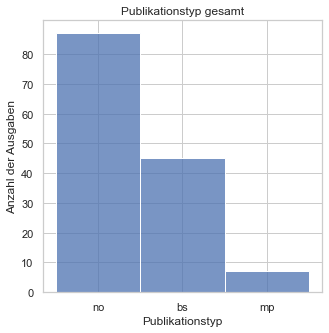

In [95]:
# Visualisierung zur Verteilung der Publikationstypen insgesamt
plt.figure(figsize=(5,5))
plt.yticks(range(0,90,10))
plt.title('Publikationstyp gesamt')
plt.xlabel('Publikationstyp')
plt.ylabel('Anzahl der Ausgaben')
sns.set_context('poster')
sns.set_theme(style="whitegrid")
sns.histplot(data=gw_ed, x="no_mp_bs", discrete=True)

# speichert die Visualisierung
# plt.savefig('graphics/publtyp_gesamt.svg')

### 8.2 Publikationstyp pro Offizin <a id="8.2"></a>

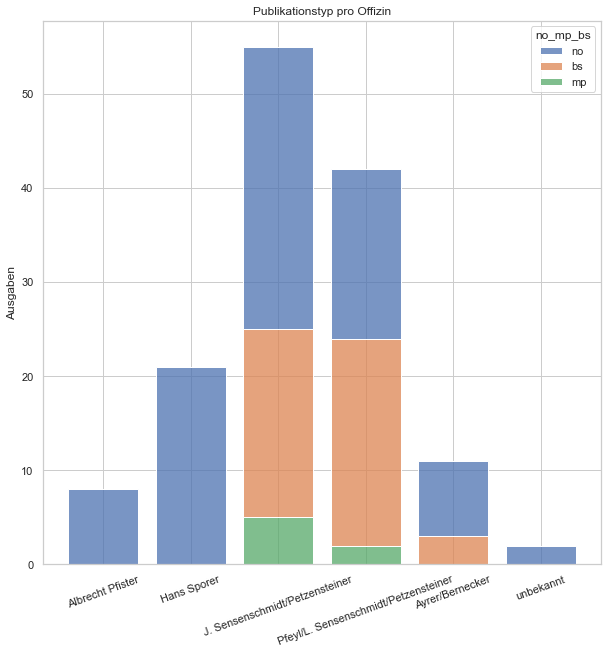

In [96]:
plt.figure(figsize=(10,10))
plt.title('Publikationstyp pro Offizin')
plt.xlabel(' ')
plt.ylabel('Ausgaben')
sns.set_context('poster')
sns.set_theme(style="whitegrid")
sns.histplot(data=gw_ed_offices, x="Offizin", hue="no_mp_bs", multiple="stack", shrink=.8)
plt.xticks(rotation = 20);

# speichert die Visualisierung
# plt.savefig('graphics/publtyp_offizin.svg')

## 9. Format <a id="9."></a>

### 9.1 Format gesamt <a id="9.1"></a>

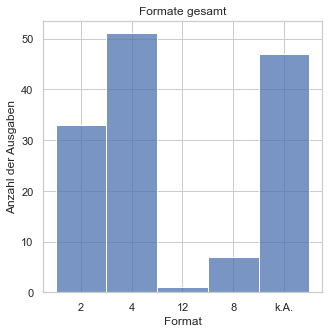

In [97]:
# Visualisierung zur Verteilung der Formate insgesamt
plt.figure(figsize=(5,5))
plt.yticks(range(0,90,10))
plt.title('Formate gesamt')
plt.xlabel('Format')
plt.ylabel('Anzahl der Ausgaben')
sns.set_context('poster')
sns.set_theme(style="whitegrid")
sns.histplot(data=gw_ed, x="Format", discrete=True)

# speichert die Visualisierung
# plt.savefig('graphics/format_gesamt.svg')

### 9.2 Format pro Offizin <a id="9.2"></a>

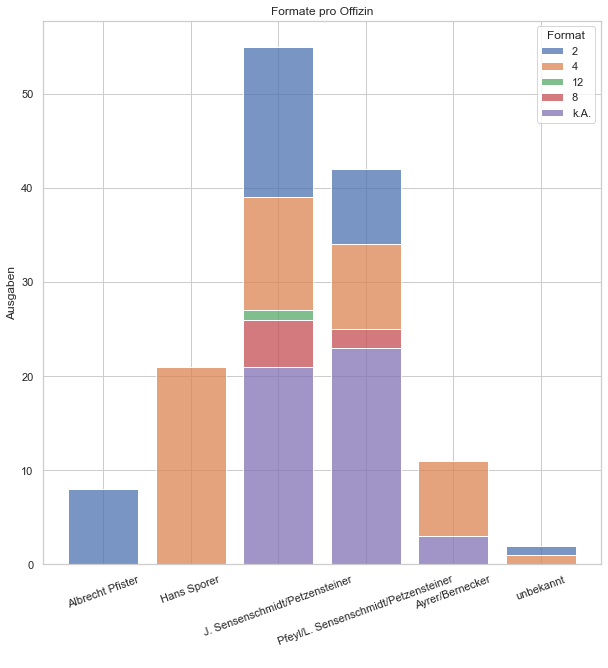

In [101]:
plt.figure(figsize=(10,10))
plt.title('Formate pro Offizin')
plt.xlabel(' ')
plt.ylabel('Ausgaben')
sns.set_context('poster')
sns.set_theme(style="whitegrid")
sns.histplot(data=gw_ed_offices, x="Offizin", hue="Format", multiple="stack", shrink=.8)
plt.xticks(rotation = 20);

# speichert die Visualisierung
plt.savefig('graphics/format_offizin.svg')

## 10. Jahresproduktion Bamberg - Häufigkeitsverteilung <a id="10."></a>

### 10.1 Häufigkeit Ausgaben/Jahr <a id="10.1"></a>

In [103]:
# erstellt neuen DataFrame, zählt Anzahl der GW-Nummern, um die jährliche Anzahl Ausgaben zu ermitteln
# Umbenennung der Spalte "GW-Nummer" in "Ausgaben"
f_ed = pd.DataFrame(gw_ed.groupby(['norm_date'])['GW-Nummer'].count())
f_ed.rename(columns={'GW-Nummer':'Ausgaben'}, inplace=True)
f_ed

Ausgaben
norm_date          
1461              1
1462              3
1463              2
1464              2
1470              1
1478              1
1481              4
1482             10
1483              4
1484              6
1485              9
1486              3
1487              3
1488              3
1489              3
1490             12
1491              9
1492              8
1493             19
1494              3
1495              7
1496              6
1497              5
1498              5
1499              5
1500              5

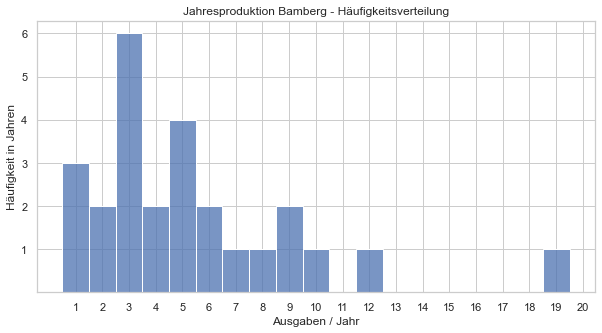

In [104]:
# erstellt ein Histogramm über die Häufigkeitsverteilung der Jahresproduktion in Ausgaben
plt.figure(figsize=(10,5))
plt.yticks(range(1,8,1))
plt.xticks(range(1,21,1))
plt.xlabel('Ausgaben / Jahr')
plt.ylabel('Häufigkeit in Jahren')
plt.title('Jahresproduktion Bamberg - Häufigkeitsverteilung')
sns.set_context('poster')
sns.set_theme(style="whitegrid")
sns.histplot(data=f_ed, x="Ausgaben", discrete=True)

# speichert die Visualisierung
# plt.savefig('graphics/haeufigkeit_ausgaben_jahr.svg')

**Lageparameter: Modus, Median, arithmetisches Mittel**

Modus (Höhepunkt des Histogramms): 3 <br/>
Am häufigsten wurden in Bamberg 3 Ausgaben pro Jahr produziert.

In [106]:
# berechnet die durchschnittliche Jahresproduktion (arithmetisches Mittel)
f_ed_mean = f_ed['Ausgaben'].mean()
f_ed_mean

5.346153846153846

Im Durchschnitt wurden in Bamberg jährlich 5.3 Ausgaben produziert.

In [107]:
# berechnet den Median 
f_ed_median = f_ed['Ausgaben'].median()
f_ed_median

4.5

Der Median liegt bei 4.5 Ausgaben pro Jahr.

**Streuungsparameter: Standardabweichung**

In [108]:
# berechnet die Standardabweichung
f_ed_std = f_ed.loc[:,'Ausgaben'].std()
f_ed_std

4.029315650998891

Die Standardabweichung beträgt 4 Ausgaben.

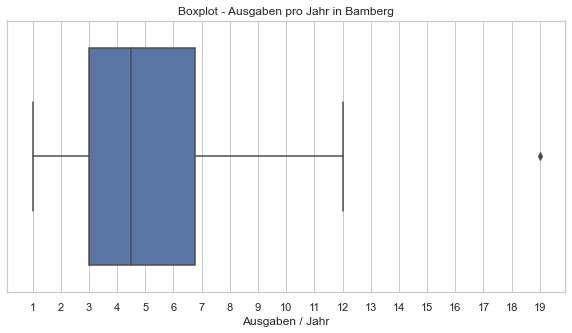

In [113]:
# Jahresproduktion Bamberg - Häufigkeitsverteilung als Boxplot
plt.figure(figsize=(10,5))
plt.xticks(range(1,20,1))
plt.title('Boxplot - Ausgaben pro Jahr in Bamberg')
sns.boxplot(x=f_ed['Ausgaben'])
plt.xlabel('Ausgaben / Jahr')

# speichert die Visualisierung
# plt.savefig('graphics/haeufigkeit_ausgaben_jahr_boxplot.svg')

In [114]:
# ermittelt einige Parameter der Häufigkeitsverteilung
f_ed.describe()

Ausgaben
count  26.000000
mean    5.346154
std     4.029316
min     1.000000
25%     3.000000
50%     4.500000
75%     6.750000
max    19.000000

### 10.2 Häufigkeit Foliobögen/Jahr <a id="10."></a>

In [115]:
# Visualisierung basiert auf gw_folio_grouped
gw_folio_grouped

Foliobögen
norm_date            
1461            44.00
1462            57.00
1463            23.00
1464            76.50
1470            12.00
1478             0.00
1481           147.50
1482            62.50
1483            61.75
1484             0.75
1485            14.50
1486             0.00
1487             9.00
1488           186.50
1489           530.50
1490           180.50
1491           213.00
1492           385.00
1493            35.00
1494             2.00
1495             1.00
1496             2.50
1497           169.00
1498             2.00
1499           157.50
1500           174.00

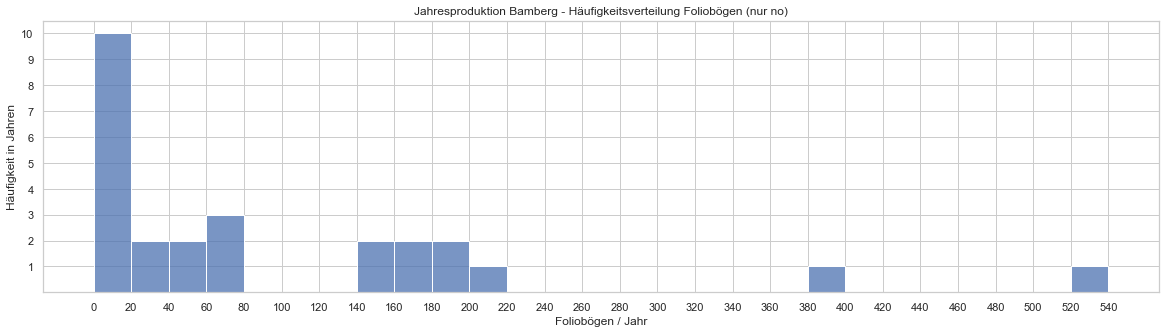

In [117]:
# erstellt ein Histogramm über die Häufigkeitsverteilung der Jahresproduktion in Foliobögen
# Weil die Anzahl der Foliobögen sich in einem größeren Zahlenraum bewegt und daher (aufgrund der kleinen Datenmenge) 
# die meisten Werte nur ein einziges Mal vorkommen, wird das Diagramm in bins einteilt (binwidth = 20).
# So erhält man eine aussagekräftigere Visualisierung als mit discrete=True, was dasselbe ist wie binwidth = 1.
plt.figure(figsize=(20,5))
plt.xticks(range(0,550,20))
plt.yticks(range(1,12,1))
plt.xlabel('Foliobögen / Jahr')
plt.ylabel('Häufigkeit in Jahren')
plt.title('Jahresproduktion Bamberg - Häufigkeitsverteilung Foliobögen (nur no)')
sns.set_context('poster')
sns.set_theme(style="whitegrid")
sns.histplot(data=gw_folio_grouped, x="Foliobögen", binwidth=20)

# speichert die Visualisierung
plt.savefig('graphics/haeufigkeit_folio_jahr.svg')

In [118]:
# ermittelt einige Parameter der Häufigkeitsverteilung
gw_folio_grouped.describe()

Foliobögen
count   26.000000
mean    97.961538
std    129.497465
min      0.000000
25%      4.125000
50%     50.500000
75%    166.125000
max    530.500000

Der Modus liegt bei 0-20 Foliobögen. <br/>
Im Durchschnitt werden in Bamberg jährlich 98 Foliobögen bedruckt. <br/>
Der Median liegt bei 50,5 Foliobögen. <br/>
Die Standardabweichung beträgt 129,5 Foliobögen.

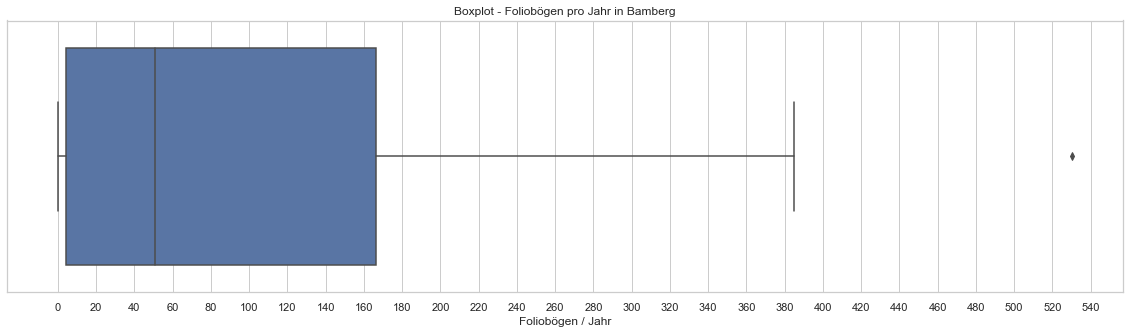

In [120]:
# Häufigkeitsverteilung der Foliobögen/Jahr als Boxplot
plt.figure(figsize=(20,5))
plt.xticks(range(0,550,20))
plt.title('Boxplot - Foliobögen pro Jahr in Bamberg')
sns.boxplot(x=gw_folio_grouped['Foliobögen'])
plt.xlabel('Foliobögen / Jahr')

# speichert die Visualisierung
# plt.savefig('graphics/haeufigkeit_folio_jahr_boxplot.svg')

## 11. Korrelation Sprache-Format-Publikationstyp <a id="11."></a>

In [3]:
# One Hot Encoding Sprache
spr_1hot = pd.get_dummies(gw_ed.norm_spr, prefix = 'Sprache', prefix_sep = '_')

# Spalten in folgende Reihenfolge bringen: ger, lat, ger lat
cols = spr_1hot.columns.tolist()
cols = ['Sprache_ger', 'Sprache_lat', 'Sprache_ger lat']
spr_1hot = spr_1hot[cols]
spr_1hot

Sprache_ger  Sprache_lat  Sprache_ger lat
0              1            0                0
1              1            0                0
2              0            1                0
3              1            0                0
4              1            0                0
..           ...          ...              ...
134            1            0                0
135            1            0                0
136            1            0                0
137            1            0                0
138            1            0                0

[139 rows x 3 columns]

In [4]:
# One Hot Encoding Format
format_1hot = pd.get_dummies(gw_ed.Format, prefix='Format')

# Spalten in folgende Reihenfolge bringen: 2, 4, 8, 12, k.A.
cols = format_1hot.columns.tolist()
cols = ['Format_2', 'Format_4', 'Format_8', 'Format_12', 'Format_k.A.']
format_1hot = format_1hot[cols]
format_1hot

Format_2  Format_4  Format_8  Format_12  Format_k.A.
0           1         0         0          0            0
1           1         0         0          0            0
2           1         0         0          0            0
3           1         0         0          0            0
4           1         0         0          0            0
..        ...       ...       ...        ...          ...
134         0         1         0          0            0
135         0         1         0          0            0
136         1         0         0          0            0
137         0         1         0          0            0
138         0         1         0          0            0

[139 rows x 5 columns]

In [5]:
# One Hot Encoding Publikationstyp
publtype_1hot = pd.get_dummies(gw_ed.no_mp_bs, prefix='Type')

# Spalten in folgende Reihenfolge bringen: no, bs, mp
cols = publtype_1hot.columns.tolist()
cols = ['Type_no', 'Type_bs', 'Type_mp']
publtype_1hot = publtype_1hot[cols]
publtype_1hot

Type_no  Type_bs  Type_mp
0          1        0        0
1          1        0        0
2          1        0        0
3          1        0        0
4          1        0        0
..       ...      ...      ...
134        1        0        0
135        1        0        0
136        1        0        0
137        1        0        0
138        1        0        0

[139 rows x 3 columns]

In [6]:
# DataFrames spr_1hot, format_1hot, publtype_1hot zusammenfügen
oneHot = pd.concat([spr_1hot, publtype_1hot], axis=1)
oneHot = pd.concat([oneHot, format_1hot], axis=1)
oneHot

Sprache_ger  Sprache_lat  Sprache_ger lat  Type_no  Type_bs  Type_mp  \
0              1            0                0        1        0        0   
1              1            0                0        1        0        0   
2              0            1                0        1        0        0   
3              1            0                0        1        0        0   
4              1            0                0        1        0        0   
..           ...          ...              ...      ...      ...      ...   
134            1            0                0        1        0        0   
135            1            0                0        1        0        0   
136            1            0                0        1        0        0   
137            1            0                0        1        0        0   
138            1            0                0        1        0        0   

     Format_2  Format_4  Format_8  Format_12  Format_k.A.  
0           1         0         0          0            0  
1           1         0         0          0            0  
2           1         0         0          0            0  
3           1         0         0          0            0  
4           1         0         0          0            0  
..        ...       ...       ...        ...          ...  
134         0         1         0          0            0  
135         0         1         0          0            0  
136         1         0         0          0            0  
137         0         1         0          0            0  
138         0         1         0          0            0  

[139 rows x 11 columns]

In [7]:
# Als Heatmap visualisieren
plt.figure(figsize=(15,10))
oneHot_corr = oneHot.corr()
oneHot_corr
sns.heatmap(oneHot_corr, annot=True, cmap='coolwarm', 
            vmin=-1, vmax=1, center= 0, square=True, 
            linewidths=1, linecolor='black')
# speichert die Visualisierung
# plt.savefig('graphics/heatmap_spr_format_publtyp.svg')
plt.savefig('graphics/heatmap_spr_format_publtyp.jpg', dpi=300)